In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import igraph as ig
import os
import pdb
import nltk
import string
import json
import random
import pickle
import pandas as pd
import seaborn as sns
import scipy

from IPython.display import clear_output
from os import makedirs
from os.path import join, exists
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
plt.style.use('classic')

In [3]:
np.arange(10,141,10)

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130, 140])

In [11]:
mod_p_scores = [0.439,0.427,0.435,0.438,0.439,0.440,0.441,0.442,0.443,0.445,0.446,0.447,0.447,0.448]
lda_p_scores = [0.279,0.324,0.331,0.336,0.338,0.340,0.342,0.342,0.342,0.343,0.343,0.343,0.343,0.343]
km_p_scores = [0.160,0.174,0.178,0.181,0.183,0.186,0.190,0.191,0.193,0.195,0.197,0.199,0.200,0.200]
hc_p_scores = [0.110,0.128,0.139,0.146,0.152,0.155,0.158,0.160,0.162,0.163,0.164,0.169,0.173,0.174]

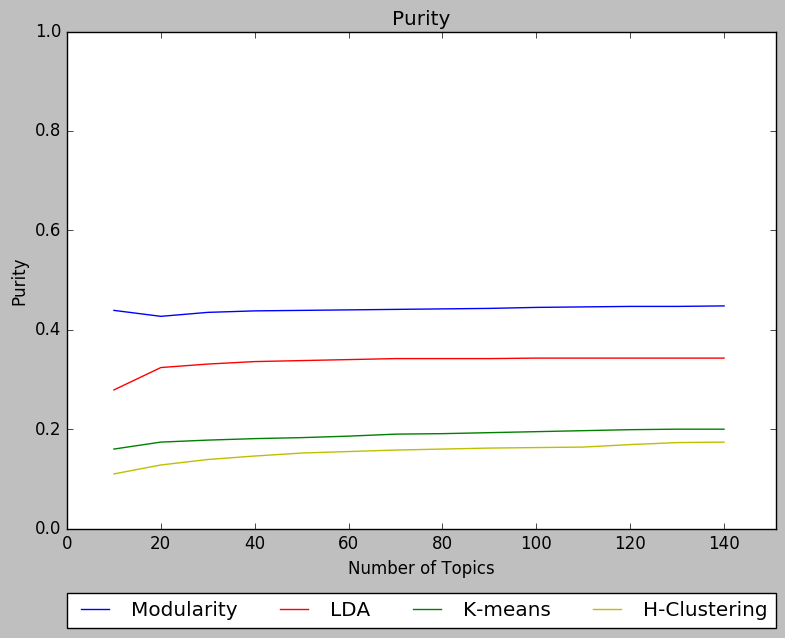

In [37]:
plt.plot(np.arange(10,141,10), mod_p_scores, 'b-', label="Modularity") 
plt.plot(np.arange(10,141,10), lda_p_scores, 'r-', label="LDA") 
plt.plot(np.arange(10,141,10), km_p_scores, 'g-', label="K-means") 
plt.plot(np.arange(10,141,10), hc_p_scores, 'y-', label="H-Clustering") 
lgd = plt.legend(bbox_to_anchor=(0., -0.2, 1., .102), loc=4,
           ncol=4, mode="expand", borderaxespad=0.)
axes = plt.gca()
axes.set_xlim([0,151])
axes.set_ylim([0.0,1.0])
plt.title("Purity")
plt.xlabel("Number of Topics")
plt.ylabel("Purity")
plt.tight_layout()
plt.savefig('tmp/purity100.png', transparent=True, bbox_extra_artists=(lgd,), bbox_inches='tight')

In [56]:
mod_e_scores = [0.607,0.617,0.618,0.616,0.616,0.615,0.615,0.614,0.613,0.612,0.611,0.610,0.610,0.610]
lda_e_scores = [0.693,0.667,0.668,0.668,0.669,0.669,0.668,0.668,0.668,0.668,0.668,0.667,0.667,0.667]
km_e_scores = [0.827,0.830,0.836,0.840,0.845,0.846,0.846,0.848,0.849,0.850,0.850,0.852,0.853,0.854]
hc_e_scores = [0.783,0.777,0.797,0.793,0.798,0.799,0.801,0.801,0.801,0.802,0.802,0.802,0.802,0.802]

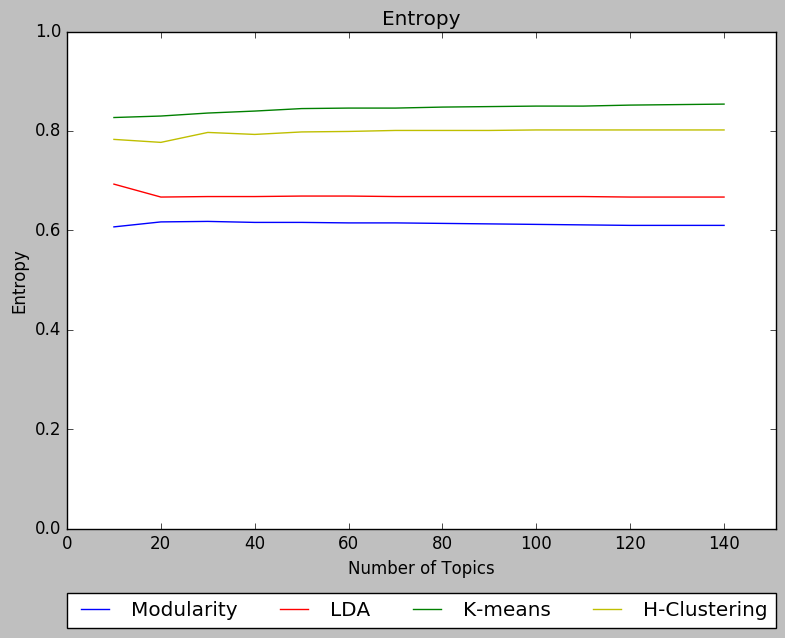

In [57]:
plt.plot(np.arange(10,141,10), mod_e_scores, 'b-', label="Modularity") 
plt.plot(np.arange(10,141,10), lda_e_scores, 'r-', label="LDA") 
plt.plot(np.arange(10,141,10), km_e_scores, 'g-', label="K-means") 
plt.plot(np.arange(10,141,10), hc_e_scores, 'y-', label="H-Clustering") 
lgd = plt.legend(bbox_to_anchor=(0., -0.2, 1., .102), loc=4,
           ncol=4, mode="expand", borderaxespad=0.)
axes = plt.gca()
axes.set_xlim([0,151])
axes.set_ylim([0.0,1.0])
plt.title("Entropy")
plt.xlabel("Number of Topics")
plt.ylabel("Entropy")
plt.tight_layout()
plt.savefig('tmp/entropy100.png', transparent=True, bbox_extra_artists=(lgd,), bbox_inches='tight')

In [6]:
mod_ter_scores = [0.405,0.320,0.244,0.171,0.131,0.108,0.090,0.079,0.071,0.065,0.061,0.057,0.053,0.051]
lda_ter_scores = [0.475,0.321,0.261,0.211,0.173,0.144,0.119,0.104,0.099,0.095,0.092,0.090,0.090,0.090]
km_ter_scores = [0.407,0.344,0.316,0.293,0.278,0.265,0.251,0.241,0.233,0.223,0.215,0.206,0.196,0.186]
hc_ter_scores = [0.296,0.247,0.216,0.190,0.164,0.150,0.138,0.136,0.127,0.129,0.123,0.119,0.116,0.113]

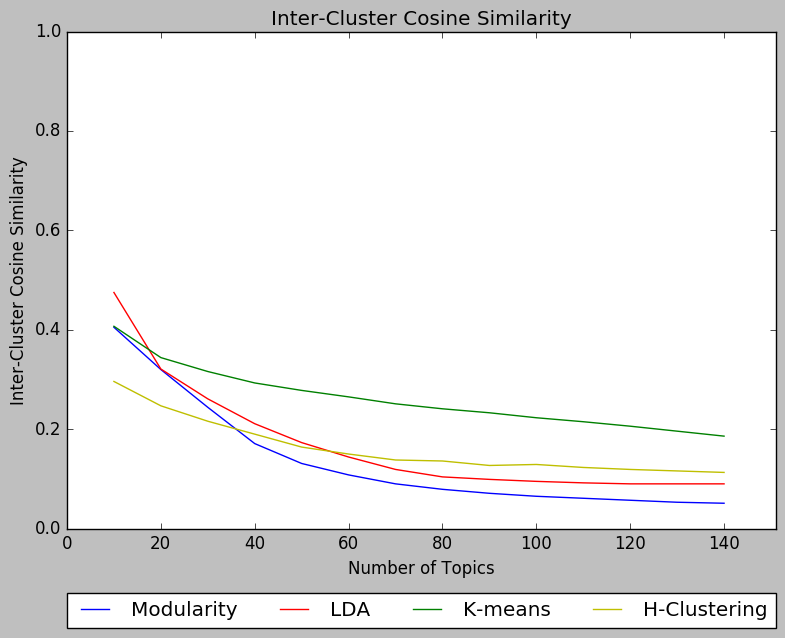

In [7]:
plt.plot(np.arange(10,141,10), mod_ter_scores, 'b-', label="Modularity") 
plt.plot(np.arange(10,141,10), lda_ter_scores, 'r-', label="LDA") 
plt.plot(np.arange(10,141,10), km_ter_scores, 'g-', label="K-means") 
plt.plot(np.arange(10,141,10), hc_ter_scores, 'y-', label="H-Clustering") 
lgd = plt.legend(bbox_to_anchor=(0., -0.2, 1., .102), loc=4,
           ncol=4, mode="expand", borderaxespad=0.)
axes = plt.gca()
axes.set_xlim([0,151])
axes.set_ylim([0.0,1.0])
plt.title("Inter-Cluster Cosine Similarity")
plt.xlabel("Number of Topics")
plt.ylabel("Inter-Cluster Cosine Similarity")
plt.tight_layout()
plt.savefig('tmp/inter100.png', transparent=True, bbox_extra_artists=(lgd,), bbox_inches='tight')

In [4]:
mod_tra_scores = [0.072,0.081,0.101,0.215,0.272,0.314,0.361,0.408,0.439,0.467,0.487,0.501,0.514,0.525]
lda_tra_scores = [0.063,0.111,0.125,0.155,0.183,0.238,0.307,0.365,0.373,0.386,0.398,0.404,0.404,0.404]
km_tra_scores = [0.121,0.144,0.151,0.158,0.165,0.171,0.178,0.184,0.190,0.196,0.202,0.212,0.223,0.237]
hc_tra_scores = [0.143,0.182,0.202,0.227,0.244,0.264,0.291,0.297,0.319,0.329,0.351,0.378,0.411,0.449]

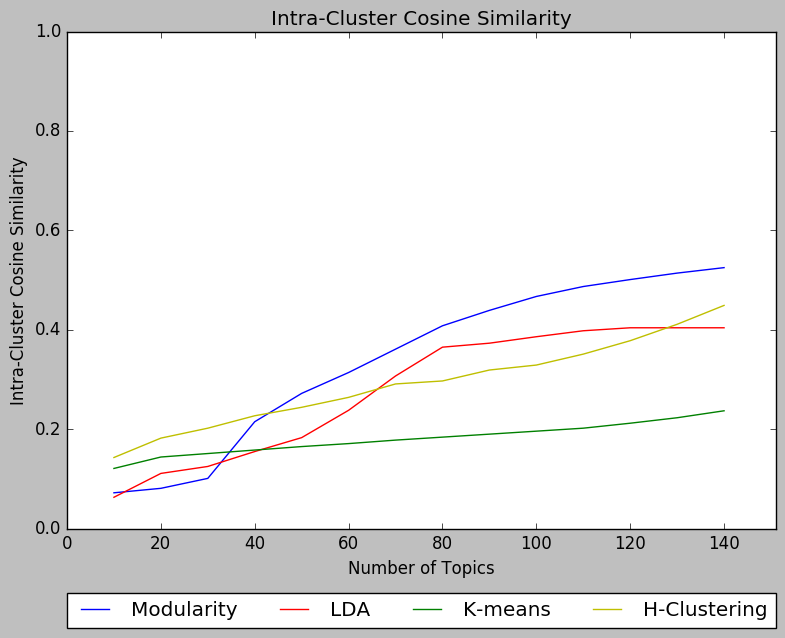

In [5]:
plt.plot(np.arange(10,141,10), mod_tra_scores, 'b-', label="Modularity") 
plt.plot(np.arange(10,141,10), lda_tra_scores, 'r-', label="LDA") 
plt.plot(np.arange(10,141,10), km_tra_scores, 'g-', label="K-means") 
plt.plot(np.arange(10,141,10), hc_tra_scores, 'y-', label="H-Clustering") 
lgd = plt.legend(bbox_to_anchor=(0., -0.2, 1., .102), loc=4,
           ncol=4, mode="expand", borderaxespad=0.)
axes = plt.gca()
axes.set_xlim([0,151])
axes.set_ylim([0.0,1.0])
plt.title("Intra-Cluster Cosine Similarity")
plt.xlabel("Number of Topics")
plt.ylabel("Intra-Cluster Cosine Similarity")
plt.tight_layout()
plt.savefig('tmp/intra100.png', transparent=True, bbox_extra_artists=(lgd,), bbox_inches='tight')